<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...



# Etape 1 - Importation des librairies et chargement des fichiers

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des fichiers via Google Drive</h3>
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Importation des librairies</h3>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3 - Chargement des fichiers Excel</h3>
</div>

In [3]:
# Importation du fichier population.csv
population = pd.read_csv('/content/drive/MyDrive/OpenClassrooms/Projet 4/Contenu du projet/population.csv')

# Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('/content/drive/MyDrive/OpenClassrooms/Projet 4/Contenu du projet/dispo_alimentaire.csv')

# Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('/content/drive/MyDrive/OpenClassrooms/Projet 4/Contenu du projet/aide_alimentaire.csv')

# Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('/content/drive/MyDrive/OpenClassrooms/Projet 4/Contenu du projet/sous_nutrition.csv')

# Etape 2 - Exploration des fichiers

## 2.1 - Analyse exploratoire du fichier population

In [4]:
# Fonction permettant d'afficher les dimensions d'un dataframe, cette requête étant demandé pour chaque fichier tout au long de ce notebook.

def dimensions(df):
    df.info()
    print("Le tableau comporte {} observation(s) ou article(s)".format(df.shape[0]))
    print("Le tableau comporte {} colonne(s)".format(df.shape[1]))

In [5]:
# Afficher les dimensions du dataset
dimensions(population)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [6]:
# Filtre pour retirer 2018 du df
population = population[population['Année'] != 2018]

In [7]:
# Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
# Multiplication de la colonne valeur par 1000
population['Valeur'] = (population['Valeur']*1000).round().astype(int)

<ipython-input-7-ec840b6c15a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['Valeur'] = (population['Valeur']*1000).round().astype(int)


In [8]:
# Changement du nom de la colonne Valeur par Population
# Utilisation de inplace=True pour remplacer le nom dans le dataframe
population.rename(columns={'Valeur': 'Population'}, inplace=True)

<ipython-input-8-5842978dc2b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.rename(columns={'Valeur': 'Population'}, inplace=True)


In [9]:
# Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


## 2.2 - Analyse exploratoire du fichier disponibilité alimentaire

In [10]:
# Afficher les dimensions du dataset
dimensions(dispo_alimentaire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [11]:
# Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Remplacement des NaN dans le dataset par des 0
# Utilisation de la méthode fillna(0) pour remplacer tous les NaN par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [13]:
# Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
col_tonnes_to_kg = [3, 4, 9, 10 ,11 ,12 ,13, 14, 15, 16, 17]
dispo_alimentaire.iloc[:, col_tonnes_to_kg] = (dispo_alimentaire.iloc[:, col_tonnes_to_kg]*1000000).round().astype(int)

In [14]:
# Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


## 2.3 - Analyse exploratoire du fichier aide alimentaire

In [15]:
# Afficher les dimensions du dataset
dimensions(aide_alimentaire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
# Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [17]:
# Changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [18]:
# Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [19]:
# Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


## 2.4 - Analyse exploratoire du fichier sous nutrition

In [20]:
# Afficher les dimensions du dataset
dimensions(sous_nutrition)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [21]:
# Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [22]:
# Conversion de la colonne sous nutrition en numérique (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
# Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce').fillna(0)

In [23]:
# Changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [24]:
# Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = (sous_nutrition['sous_nutrition']*1000000).round().astype(int)

In [25]:
# Filtre pour retirer 2018 du df
sous_nutrition = sous_nutrition[sous_nutrition['Année'] != '2017-2019']

In [26]:
# Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000


# Etape 3 - Analyses

## Les analyses suivantes se concentreront principalement sur **2017**, le fichier de disponibilité alimentaire ne comportant que cette année-ci.

## 3.1 - Proportion de personnes en sous nutrition

L'objectif est de déterminer la part des personnes en sous-nutrition par rapport à la population totale.

Cette proportion peut être calculée au niveau mondial ou par pays, et pour chaque année entre 2013 et 2017.

In [27]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# Modification des années du fichier sous_nutrition comme le suggère le lexique, ce qui permettra la jointures des deux tables via les colonnes Zone et Année, changement du type en float pour accepter la jointure.
sous_nutrition['Année'] = sous_nutrition['Année'].replace({'2012-2014': '2013', '2013-2015': '2014', '2014-2016': '2015', '2015-2017': '2016', '2016-2018': '2017'}).astype(float)
population_sous_nutrition = pd.merge(population, sous_nutrition, on=['Zone', 'Année'], how='left')

<ipython-input-27-019d5841255e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sous_nutrition['Année'] = sous_nutrition['Année'].replace({'2012-2014': '2013', '2013-2015': '2014', '2014-2016': '2015', '2015-2017': '2016', '2016-2018': '2017'}).astype(float)


In [28]:
# Fonctions permettant d'afficher la population mondiale selon l'année ou le couple pays/année
def popu(annee):
    population_annee = population_sous_nutrition[population_sous_nutrition['Année'] == annee]['Population'].sum()
    return population_annee

def popu_pays(pays, annee):
    population_pays_annee = population_sous_nutrition[(population_sous_nutrition['Zone'] == pays) & (population_sous_nutrition['Année'] == annee)]['Population'].sum()
    return population_pays_annee

# Fonctions permettant d'afficher le nombre de personnes en sous-nutrition selon l'année ou le couple pays/année
def sous_nut(annee):
    sous_nutrition_annee = population_sous_nutrition[population_sous_nutrition['Année'] == annee]['sous_nutrition'].sum().astype(int)
    return sous_nutrition_annee

def sous_nut_pays(pays, annee):
    sous_nutrition_pays_annee = population_sous_nutrition[(population_sous_nutrition['Zone'] == pays) & (population_sous_nutrition['Année'] == annee)]['sous_nutrition'].sum().astype(int)
    return sous_nutrition_pays_annee

# Fonctions qui calcule et affiche le pourcentage de personnes en sous-nutrition par rapport à la population selon l'année ou le couple pays/année
def pourcentage_sous_nutrition(annee):
    pop = popu(annee)
    sous_nu = sous_nut(annee)
    pourcentage = round((sous_nu / pop) * 100, 2)
    return pourcentage

def pourcentage_sous_nutrition_pays(pays, annee):
    pop = popu_pays(pays, annee)
    sous_nu = sous_nut_pays(pays, annee)
    pourcentage = round((sous_nu / pop) * 100, 2)
    return pourcentage

In [29]:
# Fonction pour afficher sous forme de pie chart la proportion de personne en sous-nutrition dans le monde selon l'année choisie
def pie_sous_nutrition(annee):

    # Calcul de la proportion de personnes en sous-nutrition pour l'année choisie
    propor_sous_nutri = sous_nut(annee) / popu(annee)

    # Fonction de formatage personnalisée pour afficher seulement le pourcentage de personnes en sous-nutrition dans le graphique
    def custom_autopct(pct):
        return '' if pct > 10 else f'{pct:.1f}%' # Masquer les pourcentages pour la catégorie 'Population mondiale'

    # Création d'un graphique pie
    plt.figure(figsize=(8, 8))

    # Données du pie chart
    plt.pie([propor_sous_nutri, 1 - propor_sous_nutri], labels=['Population en sous-nutrition', 'Population mondiale'], autopct=custom_autopct, startangle=65, colors=['crimson', 'lightblue'], shadow=True, explode=[0, 0.2], wedgeprops={"linewidth": 1, "edgecolor": "gray"}, textprops={"weight": "bold"})

    # Ajout du titre
    plt.title(f"Proportion de personnes en sous-nutrition dans le monde en {annee}")

    plt.show()

    # Calcul en % du nombre de personne en sous-nutrition
    propor = round((propor_sous_nutri)*100, 1)

    print(f"Il y a {sous_nut(annee).astype(int)} personnes en état de sous nutrition dans le monde en {annee}, soit {pourcentage_sous_nutrition(annee).astype(int)}% de la population mondiale ({popu(annee)})." )

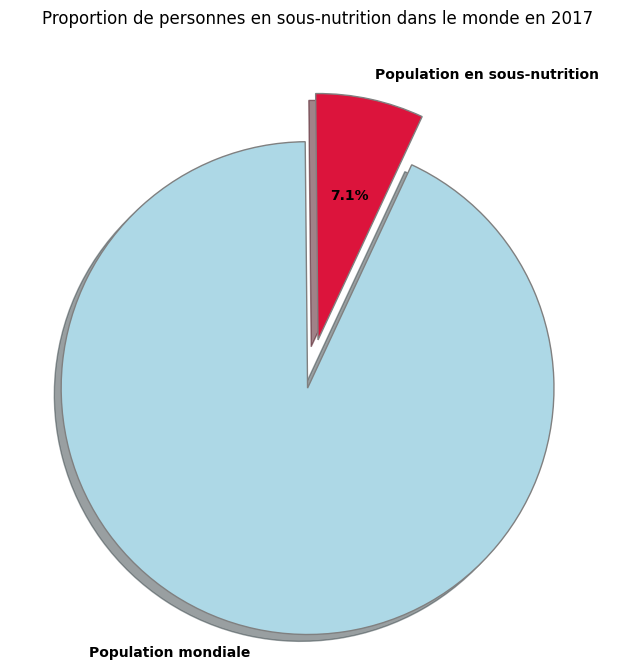

Il y a 535700000 personnes en état de sous nutrition dans le monde en 2017, soit 7% de la population mondiale (7548134111).


In [30]:
pie_sous_nutrition(2017)

In [31]:
# Fonction pour afficher sous forme de pie chart la proportion de personne en sous-nutrition par pays par année
def pie_sous_nutrition_pays(pays, annee):
    # Calcul de la proportion de personnes en sous-nutrition pour le pays et l'année choisis
    propor_sous_nutri_pays = sous_nut_pays(pays, annee) / popu_pays(pays, annee)

    # Fonction de formatage personnalisée pour afficher seulement le pourcentage de personnes en sous-nutrition dans le graphique
    def custom_autopct(pct):
        # On vérifie si le pourcentage est proche de la proportion de personnes en sous-nutrition pour le pays avec une petite marge d'erreur (0.1%)
        if abs(pct - (propor_sous_nutri_pays * 100)) < 0.1:
            return f'{pct:.1f}%'
        else:
            return ''


    # Création du graphique pie
    plt.figure(figsize=(8, 8))

    # Données du pie chart
    plt.pie([propor_sous_nutri_pays, 1 - propor_sous_nutri_pays], labels=[f'Population en sous-nutrition', 'Population'], autopct=custom_autopct, startangle=65, colors=['crimson', 'lightblue'], shadow=True, explode=[0, 0.1], wedgeprops={"linewidth": 1, "edgecolor": "gray"}, textprops={"weight": "bold"})

    # Ajout du titre
    plt.title(f'Proportion de personnes en sous-nutrition ({pays}, {annee})')

    plt.show()

    # Calcul en % du nombre de personne en sous-nutrition pour le pays
    propor_pays = round((propor_sous_nutri_pays)*100, 1)

    print(f"Il y a {sous_nut_pays(pays, annee).astype(int)} personnes en état de sous-nutrition, soit {pourcentage_sous_nutrition_pays(pays, annee).astype(int)}% de la population du pays({popu_pays(pays, annee)}).")


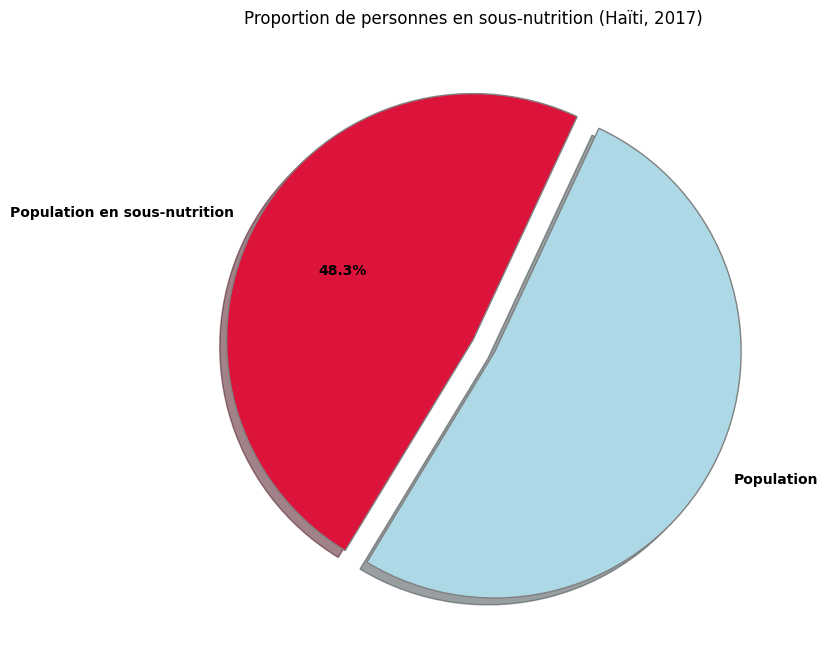

Il y a 5300000 personnes en état de sous-nutrition, soit 48% de la population du pays(10982366).


In [32]:
pie_sous_nutrition_pays('Haïti', 2017)

## 3.2 - Nombre théorique de personnes qui pourraient être nourries

Selon les chiffres défendus par la FAO dans cet article du Point (https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php), un être humain consomme en moyenne **2200 kcals** par jour.

cette valeur sera utilisée comme référence pour estimer le nombre théorique de personnes pouvant être nourries avec l'ensemble des kcals disponibles au niveau mondial.

In [33]:
# Création d'un df qui groupe les disponibilités alimentaires par pays et par origine
dispo_alim_pays_origine_2017 = dispo_alimentaire.groupby(['Zone', 'Origine']).sum().reset_index()

# Création d'un df pour cibler la population de 2017
popu_sous_nutri_2017 = population_sous_nutrition.loc[population_sous_nutrition['Année'] == 2017, :]

# Création d'un df global de 2017 en fusionnant les deux df précédemment crées
dispo_popu_2017 = pd.merge(dispo_alim_pays_origine_2017, popu_sous_nutri_2017[['Zone', 'Population', 'sous_nutrition']], on='Zone', how='left')

# Création d'une colonne qui regroupe les kcals totales du pays en multipliant les kcal par personne à la population du pays
dispo_popu_2017['Dispo Kcal totale'] = (dispo_popu_2017['Population']*dispo_popu_2017['Disponibilité alimentaire (Kcal/personne/jour)']).round(2)

# Affichage des 5 premières lignes du dataframe
dispo_popu_2017.head()

,Zone,Origine,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,sous_nutrition,Dispo Kcal totale
0,Afghanistan,animale,"Abats ComestibleBeurre, GheeCrèmeGraisses Anim...",1.230000e+08,0.0,216.0,79.92,15.23,12.21,2.631000e+09,...,3.500000e+08,2.442000e+09,6.300000e+07,2.280000e+09,2000000.0,0.000000e+00,0.000000e+00,36296113.0,10500000.0,7.839960e+09
1,Afghanistan,vegetale,"Agrumes, AutresAliments pour enfantsAnanasBana...",6.450000e+08,415000000.0,1871.0,271.49,18.27,46.05,1.088400e+10,...,2.638000e+09,8.293000e+09,1.072000e+09,8.891000e+09,393000000.0,6.300000e+07,-3.680000e+08,36296113.0,10500000.0,6.791003e+10
2,Afrique du Sud,animale,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1.870000e+08,115000000.0,487.0,139.63,34.66,36.39,7.817000e+09,...,1.049000e+09,7.371000e+09,8.300000e+07,7.614000e+09,67000000.0,0.000000e+00,2.410000e+08,57009756.0,3100000.0,2.776375e+10
3,Afrique du Sud,vegetale,"Agrumes, AutresAlcool, non ComestibleAliments ...",5.122000e+09,761000000.0,2533.0,425.17,48.92,48.94,5.343900e+10,...,6.468000e+09,2.244100e+10,2.110000e+09,5.564900e+10,186000000.0,2.281900e+10,1.912000e+09,57009756.0,3100000.0,1.444057e+11
4,Albanie,animale,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1.010000e+08,2000000.0,985.0,389.05,67.72,59.41,1.432000e+09,...,8.700000e+07,1.235000e+09,9.400000e+07,1.355000e+09,0.0,0.000000e+00,0.000000e+00,2884169.0,100000.0,2.840906e+09


In [34]:
# Calcul des kcals disponibles mondialement
dispo_kcal_mondiale =dispo_popu_2017['Dispo Kcal totale'].sum().astype(int)

# Variable de la consommation moyenne en kcal d'un être humain
kcal_moyenne = 2200

# Calcul du nombre d'humains pouvant être nourris
humains_nourris = (dispo_kcal_mondiale/kcal_moyenne).astype(int)

# Calcul de la proportion d'humains pouvant être nourris sur la population mondiale
proportion_humains_nourris = round((humains_nourris/popu(2017))*100, 1)

# Conversion des valeurs en milliards
humains_nourris_billion = humains_nourris / 1e9
population_mondiale_billion = popu(2017) / 1e9

# Données pour le bar chart
categories = ['Population mondiale', 'Théorique humains nourris']
values = [population_mondiale_billion, humains_nourris_billion]

<ipython-input-35-a861d5a114c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=['lightblue', 'seagreen'])


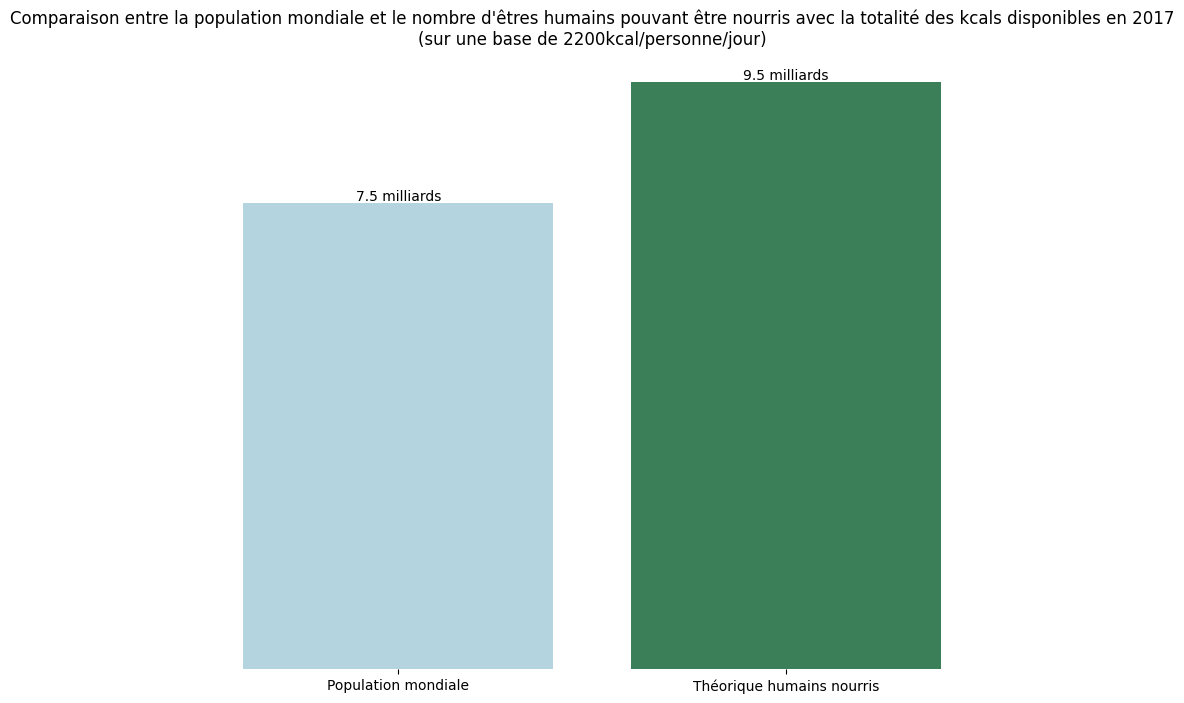

Il y a 20918984627331 kcals disponibles mondialement.
En tenant compte des 2200 kcals qu'un être humain consomme par jour, 9.5 milliards d'êtres humains pourraient êtres nourris, soit 126% de la population mondiale en 2017.


In [35]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=categories, y=values, palette=['lightblue', 'seagreen'])

# Ajout des étiquettes sur les barres
for position, valeur in enumerate(values):
    plt.text(position, valeur, f'{valeur:.1f} milliards', ha='center', va='bottom')

# Supression de l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Ajout du titre
plt.title("Comparaison entre la population mondiale et le nombre d'êtres humains pouvant être nourris avec la totalité des kcals disponibles en 2017\n(sur une base de 2200kcal/personne/jour)")

plt.show()

print(f"Il y a {dispo_kcal_mondiale} kcals disponibles mondialement.")
print(f"En tenant compte des 2200 kcals qu'un être humain consomme par jour, {humains_nourris_billion:.1f} milliards d'êtres humains pourraient êtres nourris, soit {proportion_humains_nourris.astype(int)}% de la population mondiale en 2017.")

## 3.3 - Nombre théorique de personnes qui pourraient être nourries avec les produits végétaux

Nous allons analyser la répartition entre les origines végétale et animale dans la disponibilité alimentaire mondiale, puis déterminer comme précédemment le nombre théorique de personnes pouvant être nourries en utilisant exclusivement les kcals d'origine végétale.

In [36]:
# Calcul des kcals mondiale d'origine végétale
dispo_kcal_mondiale_veg = dispo_popu_2017.loc[dispo_popu_2017['Origine'] == 'vegetale', 'Dispo Kcal totale'].sum().astype(int)

# Calcul de la proportion de kcals végétales
propor_veg = dispo_kcal_mondiale_veg/dispo_kcal_mondiale

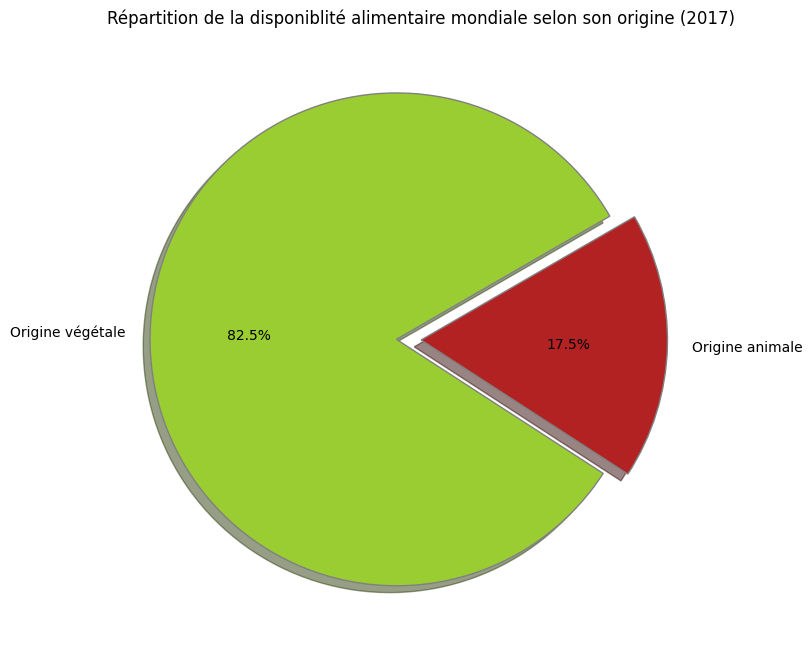

Il y a 17260764211501 kcals d'origine végétale disponibles mondialement, soit 82% de la disponibilité mondiale.


In [37]:
# Création d'un graphique avec Matplotlib
plt.figure(figsize=(8, 8))

# Données du pie chart
plt.pie([propor_veg, 1 - propor_veg], labels=['Origine végétale', 'Origine animale'], autopct='%1.1f%%', startangle=30, colors=['yellowgreen', 'firebrick'], shadow=True, explode=[0.1, 0], wedgeprops = {"linewidth": 1, "edgecolor": "gray"})

# Ajout du titre
plt.title('Répartition de la disponiblité alimentaire mondiale selon son origine (2017)')

plt.show()
print(f"Il y a {dispo_kcal_mondiale_veg} kcals d'origine végétale disponibles mondialement, soit 82% de la disponibilité mondiale.")

In [38]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux
humains_nourris_veg = round(dispo_kcal_mondiale_veg / kcal_moyenne)

# Calcul de la proportion d'humains nourris avec les végétaux par rapport à la population mondiale
proportion_humains_nourris_veg = round((humains_nourris_veg / popu(2017)) * 100, 1)

# Conversion des valeurs en milliards
humains_nourris_veg_billion = humains_nourris_veg / 1e9

# Données pour le bar chart
categories = ['Population mondiale', 'Théorique humains nourris']
valeurs = [population_mondiale_billion, humains_nourris_veg_billion]

<ipython-input-39-b0416d994049>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=valeurs, palette=['lightblue', 'yellowgreen'])


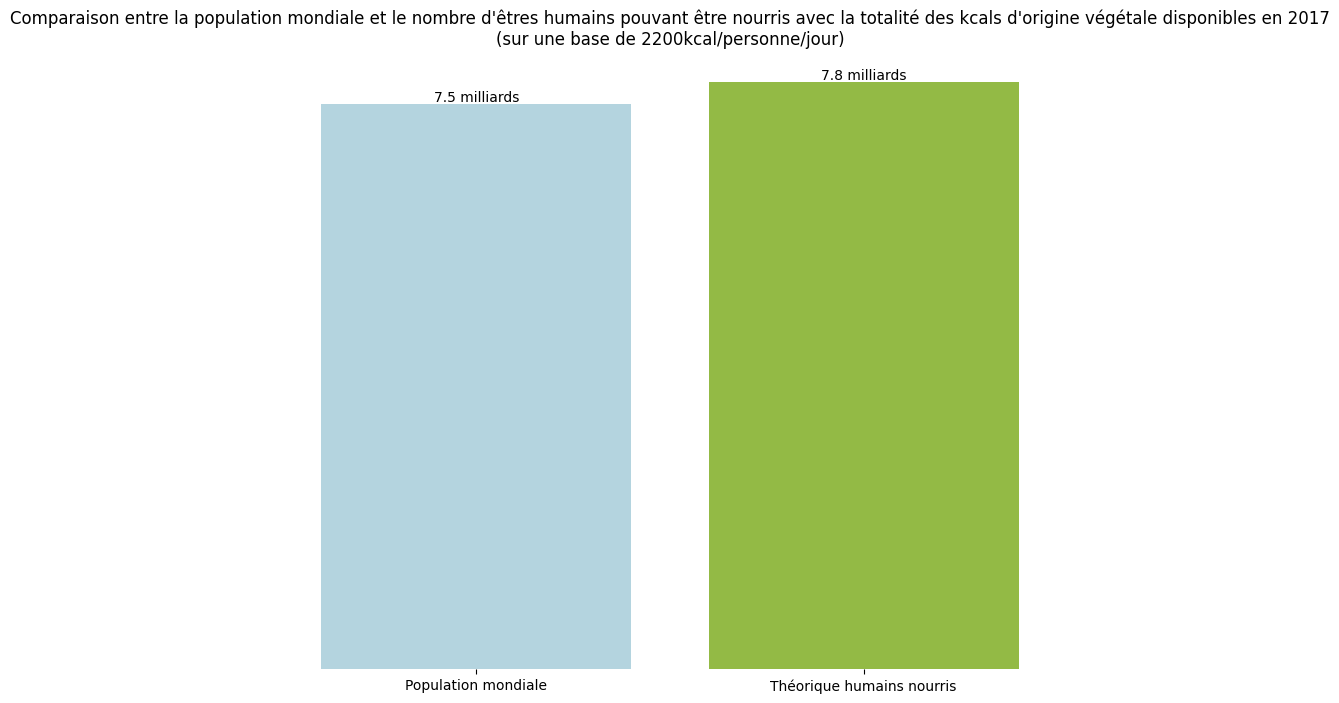

En tenant compte des 2200 kcals qu'un être humain consomme par jour, 7.8 milliards d'êtres humains pourraient être nourris avec les végétaux, soit 103% de la population mondiale.


In [39]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=categories, y=valeurs, palette=['lightblue', 'yellowgreen'])

# Ajout des étiquettes sur les barres
for position, valeur in enumerate(valeurs):
    plt.text(position, valeur, f'{valeur:.1f} milliards', ha='center', va='bottom')

# Supression de l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Aout du titre
plt.title("Comparaison entre la population mondiale et le nombre d'êtres humains pouvant être nourris avec la totalité des kcals d'origine végétale disponibles en 2017\n(sur une base de 2200kcal/personne/jour)")

plt.show()

print(f"En tenant compte des 2200 kcals qu'un être humain consomme par jour, {humains_nourris_veg_billion:.1f} milliards d'êtres humains pourraient être nourris avec les végétaux, soit {proportion_humains_nourris_veg.astype(int)}% de la population mondiale.")

## 3.4 - Utilisation de la disponibilité intérieure

La **disponibilité intérieure** peut être calculée suivant cette équation :

*Production + Importations - Exportations + Variation de stock
=
**Disponibilité intérieure**
=
Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations*

Nous allons vérifier la répartition de la disponibilité au niveau mondial.

In [40]:
# Création d'une liste regroupant les variables de la disponibilité intérieure
liste_dispo_int = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']

# Création du df pour le bar chart
data_dispo_int = dispo_alimentaire[liste_dispo_int]

# Calcul de la somme de chaque colonne
total_data_dispo_int = data_dispo_int.sum(axis=0)

# Calcul du total de la disponiblité
total_dispo = total_data_dispo_int.sum()

# Tri des données en ordre décroissant
total_data_dispo_int_sorted = total_data_dispo_int.sort_values(ascending=False)

<ipython-input-41-853557a7c8bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_data_dispo_int_sorted.values / total_dispo * 100, y=total_data_dispo_int_sorted.index, palette='viridis')


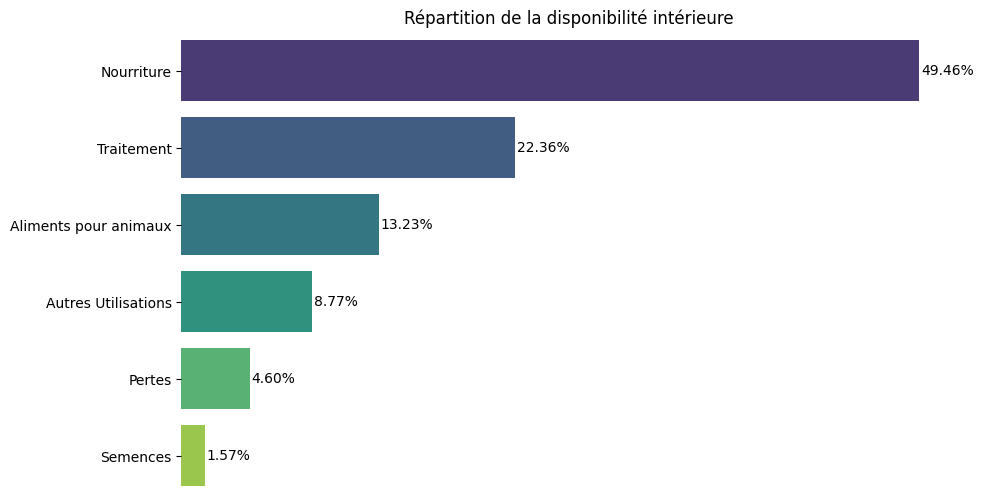

La disponibilité totale correspond à 9858592000000.0 kg dans le monde, soit presque 10 milliard de tonnes.


In [41]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=total_data_dispo_int_sorted.values / total_dispo * 100, y=total_data_dispo_int_sorted.index, palette='viridis')

# Ajout des étiquettes sur les barres
for i, v in enumerate(total_data_dispo_int_sorted.values):
    plt.text(v / total_dispo * 100 + 0.1, i, f"{v / total_dispo * 100:.2f}%", color='black', ha='left', va='center')

# Supression de l'axe des x et sa ligne
plt.gca().axes.get_xaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Masquer l'étiquette de l'axe des y
plt.ylabel('')

# Ajout du titre
plt.title('Répartition de la disponibilité intérieure')

plt.show()

print(f"La disponibilité totale correspond à {total_dispo} kg dans le monde, soit presque 10 milliard de tonnes.")

In [42]:
# Création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, etc...
for value in liste_dispo_int:
    somme_value = round(dispo_alimentaire[value].sum())
    print(f"La disponibilité pour la catégorie {value} correspond à {somme_value} kg.")

La disponibilité pour la catégorie Aliments pour animaux correspond à 1304245000000 kg.
La disponibilité pour la catégorie Autres Utilisations correspond à 865023000000 kg.
La disponibilité pour la catégorie Nourriture correspond à 4876258000000 kg.
La disponibilité pour la catégorie Pertes correspond à 453698000000 kg.
La disponibilité pour la catégorie Semences correspond à 154681000000 kg.
La disponibilité pour la catégorie Traitement correspond à 2204687000000 kg.


## 3.5 - Utilisation des céréales

Les céréales constituant la composante prédominante de la disponibilité alimentaire d'origine végétale, nous allons nous concentrer sur cette catégorie.


In [43]:
# Création d'une liste avec toutes les variables
liste_cereales = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho']

In [44]:
# Création d'un dataframe avec les informations uniquement pour ces céréales
df_cereale = dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste_cereales)]
df_cereale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


In [45]:
# Création du df pour le bar chart
data_dispo_int_cereale = df_cereale[liste_dispo_int]

# Calcul de la somme de chaque colonne
total_data_dispo_int_cereale = data_dispo_int_cereale.sum(axis=0)

# Calcul du total
total_dispo_cereale = total_data_dispo_int_cereale.sum()

# Tri des données en ordre décroissant
total_data_dispo_int_cereale_sorted = total_data_dispo_int_cereale.sort_values(ascending=False)

<ipython-input-46-27a8a75c7be3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_data_dispo_int_cereale_sorted.values / total_dispo_cereale * 100, y=total_data_dispo_int_cereale_sorted.index, palette='viridis')


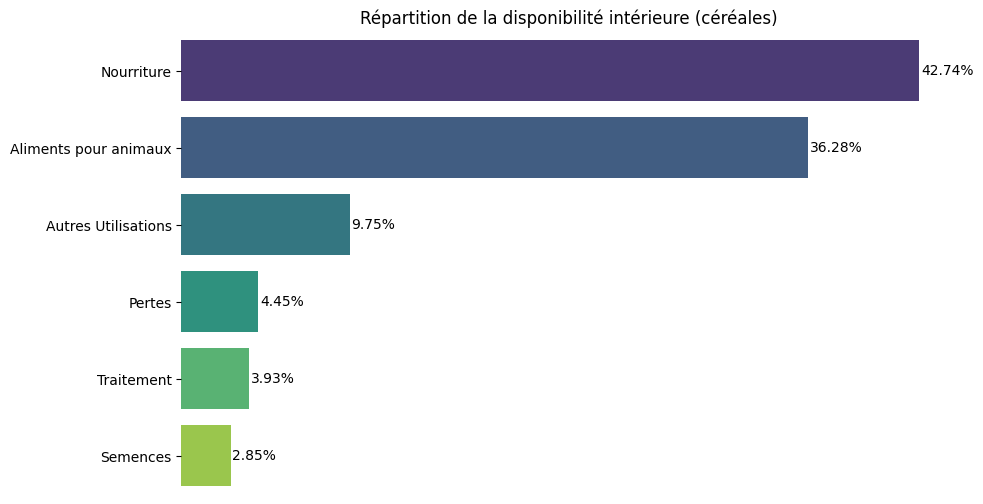

36% soit plus d'1/3 de la disponibilité céréalière est consacrée aux animaux.


In [46]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=total_data_dispo_int_cereale_sorted.values / total_dispo_cereale * 100, y=total_data_dispo_int_cereale_sorted.index, palette='viridis')

# Ajout des étiquettes sur les barres
for i, v in enumerate(total_data_dispo_int_cereale_sorted.values):
    plt.text(v / total_dispo_cereale * 100 + 0.1, i, f"{v / total_dispo_cereale * 100:.2f}%", color='black', ha='left', va='center')

# Supression de l'axe des x et sa ligne
plt.gca().axes.get_xaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Masquer l'étiquette de l'axe des y
plt.ylabel('')

# Ajout du titre
plt.title('Répartition de la disponibilité intérieure (céréales)')

plt.show()

print("36% soit plus d'1/3 de la disponibilité céréalière est consacrée aux animaux.")

In [47]:
# Répartition de chaque céréale par utilisation
repart_cereale = df_cereale.groupby('Produit')[liste_dispo_int].sum()

# Calcul du total de chaque ligne
totals_par_produit = repart_cereale.sum(axis=1)

# Transformation en pourcentage
pourcentages_cereales = (repart_cereale.div(totals_par_produit, axis=0) * 100).round(1).sort_values(by='Nourriture', ascending=False)

# Création d'une liste des deux colonnes pour le bar chart
liste_hum_ani = ['Nourriture', 'Aliments pour animaux']

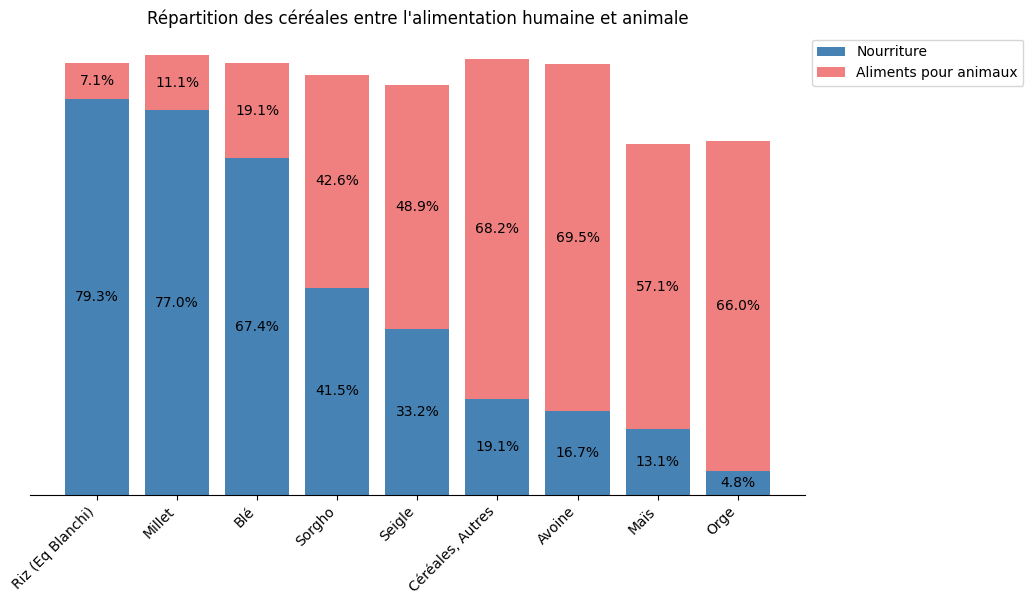

Le riz, le millet et le blé concernent d'avantage l'alimentation humaine tandis que le reste est beaucoup plus concentré sur l'alimentation animale.


In [48]:
# Création du graphique à barres empilées avec Matplotlib
plt.figure(figsize=(10, 6))

# Initialiser la liste de base pour la hauteur de chaque groupe
base = [0] * len(pourcentages_cereales)

# Choix des couleurs
couleurs = ['steelblue', 'lightcoral']

# Traçage des barres empilées
for i, col in enumerate(liste_hum_ani):
    plt.bar(pourcentages_cereales.index, pourcentages_cereales[col], bottom=base, color=couleurs[i], label=col)
    base = [base[j] + pourcentages_cereales[col][j] for j in range(len(base))]  # Mettre à jour la base pour le prochain groupe

# Ajout des valeurs au-dessus de chaque barre
    for j, val in enumerate(pourcentages_cereales[col]):
        plt.text(j, base[j] - pourcentages_cereales[col][j] / 2, f'{val}%', ha='center', va='center')

# Ajout de légendes et de titres
plt.title("Répartition des céréales entre l'alimentation humaine et animale")
plt.legend(bbox_to_anchor=(1, 1))

# Masquer l'axe des Y et cadres
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_yticks([])

# Ajustement de l'espacement entre les étiquettes de l'axe x
plt.xticks(rotation=45, ha='right')

plt.show()

print("Le riz, le millet et le blé concernent d'avantage l'alimentation humaine tandis que le reste est beaucoup plus concentré sur l'alimentation animale.")

## 3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017

 Identifier les dix pays ayant la proportion de personnes sous-alimentées la plus élevée en 2017, dans le but de mettre en lumière les régions les plus touchées par la sous-nutrition dans le monde.

La liste peut également être générée pour chaque année allant de 2013 à 2017.

In [49]:
# Création de la colonne proportion par pays dans le df population_sous_nutrition
population_sous_nutrition['proportion par pays'] = ((population_sous_nutrition['sous_nutrition']/population_sous_nutrition['Population'])*100).round(2)

In [50]:
# Création d'une fonction permettant d'afficher un bar chart des 10 pires pays selon l'année séléctionnée
def graph_top10_sous_nut(annee):

  # Création d'une variable listant les 10 pires pays
  top_10_pays_sous_nut = population_sous_nutrition.loc[population_sous_nutrition['Année'] == annee].sort_values(by='proportion par pays', ascending=False).head(10)

  # Création du graphique en barres avec Seaborn
  plt.figure(figsize=(10, 8))
  sns.barplot(x='Zone', y='proportion par pays', data=top_10_pays_sous_nut, color='indianred')

  # Ajout des valeurs au-dessus des barres
  for index, value in enumerate(top_10_pays_sous_nut['proportion par pays']):
      plt.text(index, value, f'{round(value, 2)}%', ha='center', va='bottom')

  # Masquer l'étiquette de l'axe x
  plt.xlabel('')

  # Ajout du titre
  plt.title(f'Pays avec la proportion de personnes sous-alimentée la plus forte en {annee}')

  # Enlever l'axe des y et sa ligne
  plt.gca().axes.get_yaxis().set_visible(False)
  sns.despine(left=True, bottom=True)

  # Ajustement de l'espacement entre les étiquettes de l'axe x
  plt.xticks(rotation=45, ha='right')

  # Améliorer la lisibilité du graphique
  plt.tight_layout()

  plt.show()

In [51]:
# Création d'un df pour avoir les 10 pires pays en sous-nutrition
df_top_10_sous_nut = population_sous_nutrition.loc[population_sous_nutrition['Année'] == 2017].sort_values(by='proportion par pays', ascending=False).head(10)

# Calcul du nombre total de personnes en sous-nutrition dans ces 10 pays
total_top_10_sous_nut = df_top_10_sous_nut['sous_nutrition'].sum()

# Calcul de le proportion par rapport à la population mondiale en sous-nutrition
pourcentage_top_10_sous_nut = (total_top_10_sous_nut/sous_nut(2017))*100

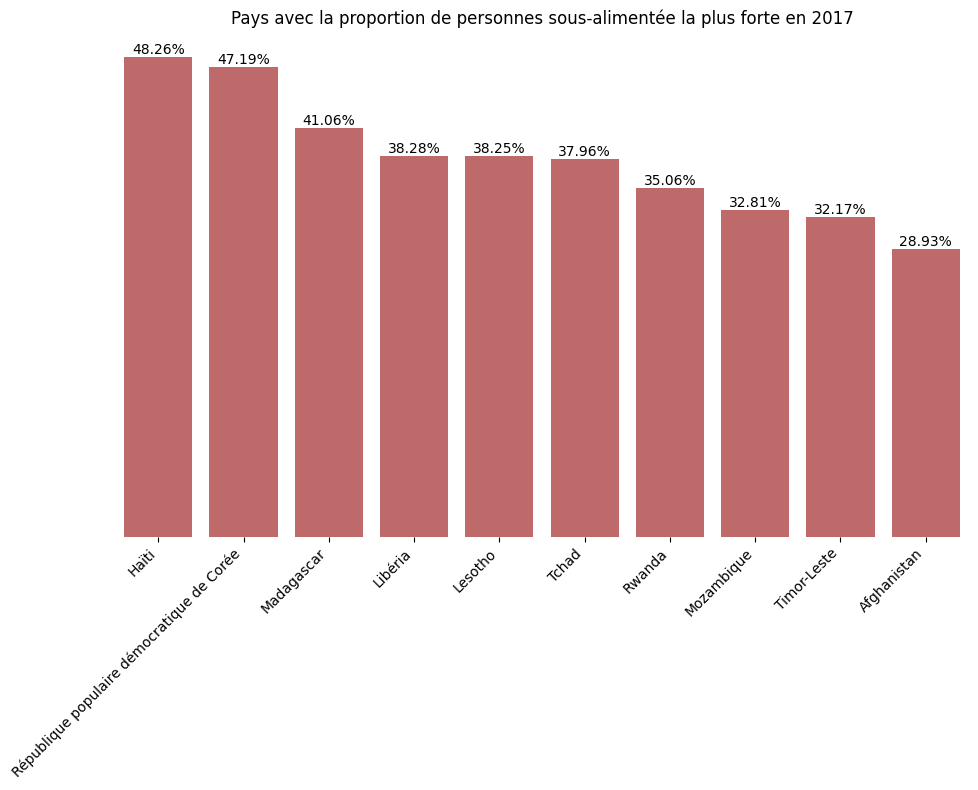

Ces 10 pays représentent 11% de la population mondiale en sous-nutrition.


In [52]:
graph_top10_sous_nut(2017)
print(f"Ces 10 pays représentent {pourcentage_top_10_sous_nut.astype(int)}% de la population mondiale en sous-nutrition.")

## 3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013

Analyse visant à identifier les dix pays ayant le plus bénéficié de l'aide alimentaire depuis 2013 jusqu'à 2016 (les données du fichier d'aide alimentaire ne vont pas au-delà de cette période).

In [53]:
# Calcul du total de l'aide alimentaire par pays
total_aide = aide_alimentaire.groupby('Zone')['Valeur'].sum()

# Tri des 10 pays
top_10_pays_aide = total_aide.sort_values(ascending=False).head(10)

# Calcul de la proportion de ces 10 pays par rapport à l'aide mondiale
pourcentage_top_10_pays_aide = (top_10_pays_aide.sum()/total_aide.sum())*100

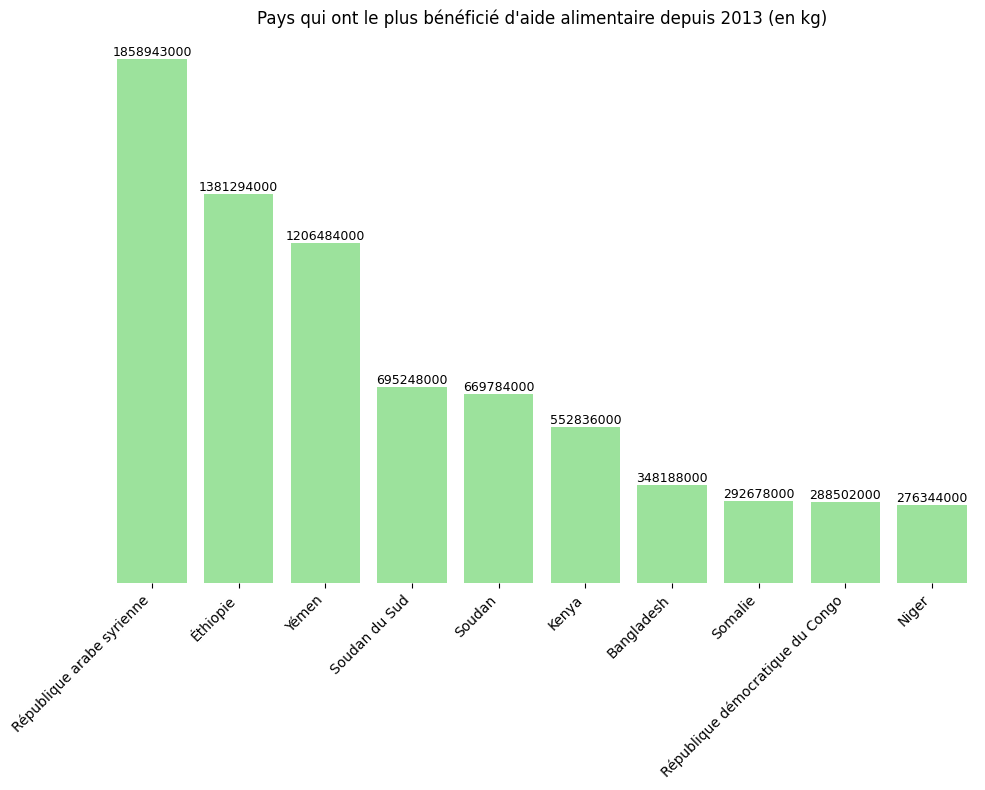

Ces 10 pays représentent 68% de l'aide mondiale.


In [54]:
# Création du barplot avec Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_pays_aide.index, y=top_10_pays_aide.values, color='lightgreen')

# Ajout des étiquettes et titre
plt.xlabel('')
plt.title("Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013 (en kg)")

# Ajout des valeurs au-dessus des barres
for index, value in enumerate(top_10_pays_aide.values):
    plt.text(index, value, round(value, 2), ha='center', va='bottom', fontsize =9)

# Enlever l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Ajustement des étiquettes de l'axe x
plt.xticks(rotation=45, ha='right')

# Améliorer la lisiblité du graphique
plt.tight_layout()

plt.show()
print(f"Ces 10 pays représentent {pourcentage_top_10_pays_aide.astype(int)}% de l'aide mondiale.")

## 3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016

Mise en avant de l'évolution sur quatre ans des cinq pays ayant le plus bénéficié de l'aide alimentaire entre 2013 et 2016, permettant ainsi d'analyser les tendances et les changements dans la distribution de cette assistance sur cette période.

In [55]:
# Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
evolution_aide = aide_alimentaire.drop(columns=['Produit']).groupby(['Zone', 'Année']).sum()

# Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_top5_pays = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

# Filtre sur le dataframe avec la liste
# Filtre avec la méthode .index.get_level_values pour pouvoir filtrer les zones de l'index Zone/Année
evolution_aide_top5_pays = evolution_aide.loc[evolution_aide.index.get_level_values('Zone').isin(liste_top5_pays)].reset_index()

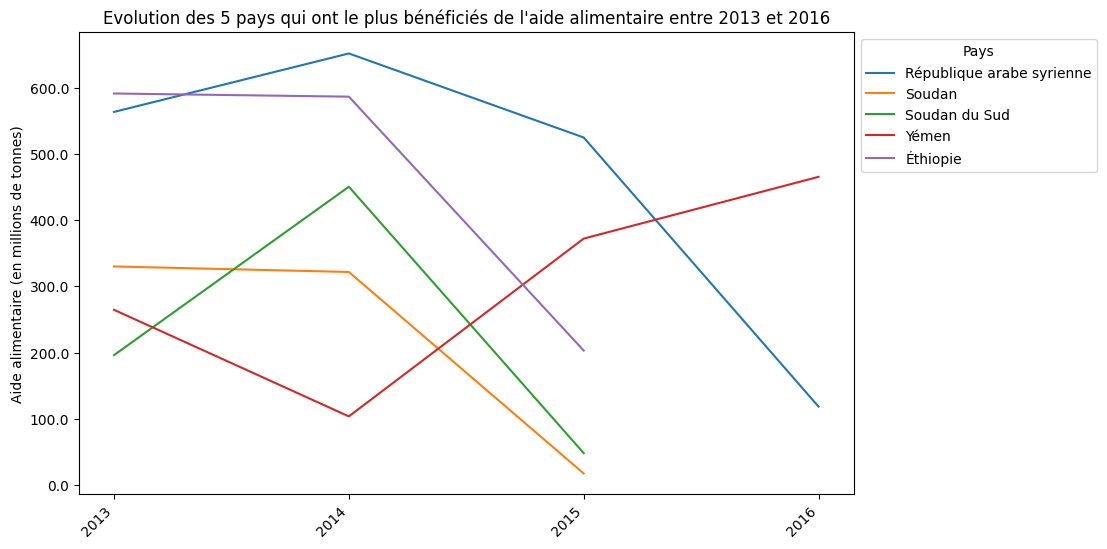

In [56]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Année', y='Valeur', hue='Zone', data=evolution_aide_top5_pays)

# Masquer le titre de l'axe x et ajout de celui de l'axe y
plt.xlabel('')
plt.ylabel('Aide alimentaire (en millions de tonnes)')

# Création de la fonction pour formater les étiquettes de l'axe y
def millions_formatter(x, pos):
    return f'{x / 1e6}'

# Appliquer le formatter à l'axe y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Ajout du titre et légendes des courbes
plt.title("Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016")
plt.legend(title='Pays', bbox_to_anchor=(1, 1))

# Ajustement des étiquettes de l'axe x
plt.xticks(range(int(evolution_aide_top5_pays['Année'].min()), int(evolution_aide_top5_pays['Année'].max()) + 1))
plt.xticks(rotation=45, ha='right')

plt.show()

## 3.9 - Pays avec le moins de disponibilité par habitant

Cette analyse vise à identifier les 10 pays présentant la disponibilité alimentaire par habitant la plus faible en 2017, mettant ainsi en lumière les régions confrontées aux plus grands défis en matière de disponibilité alimentaire.

In [57]:
# Calcul de la disponibilité en kcal par personne par jour par pays
kcal_par_pers_2017 = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].agg('sum')

# Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
top10_pays_moins_dispo_2017 = kcal_par_pers_2017.sort_values(ascending=True).head(10)

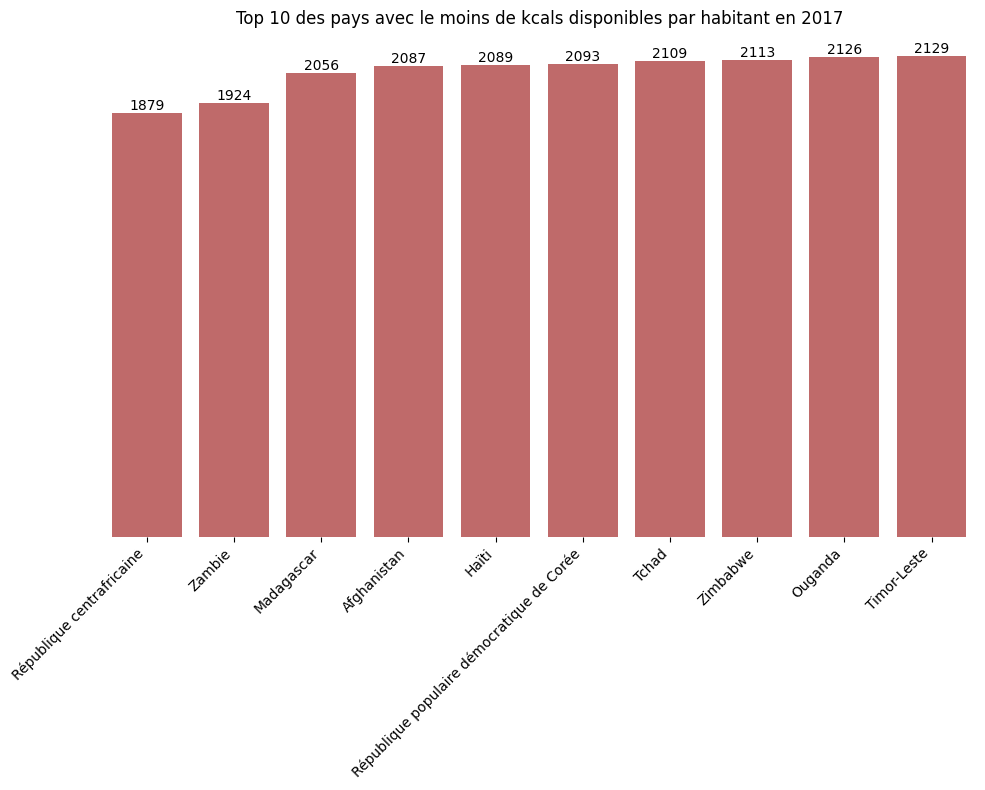

Aucun de ces 10 pays ne dépassent le seuil de 2200 kcals recommandé par la FAO.


In [58]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 8))

# Ajout des données
sns.barplot(x=top10_pays_moins_dispo_2017.index, y=top10_pays_moins_dispo_2017.values, color='indianred')

# Ajout des valeurs sur les barres
for index, value in enumerate(top10_pays_moins_dispo_2017.values):
  plt.text(index, value, round(value), ha='center', va='bottom')

# Masquer le titre de l'axe x
plt.xlabel('')

#Ajout du titre
plt.title('Top 10 des pays avec le moins de kcals disponibles par habitant en 2017')

# Supression de l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

plt.xticks(rotation=45, ha='right')

# Améliorer la lisilbité du graphique
plt.tight_layout()

plt.show()
print("Aucun de ces 10 pays ne dépassent le seuil de 2200 kcals recommandé par la FAO.")

## 3.10 - Pays avec le plus de disponibilité par habitant

Cette analyse cherche à identifier les 10 pays ayant la plus grande disponibilité alimentaire par habitant en 2017, mettant en évidence les régions bénéficiant d'une abondance relative de ressources alimentaires.

In [59]:
# Affichage des 10 pays qui ont le plus de dispo alimentaire par personne
top_10_pays_plus_dispo_2017 = kcal_par_pers_2017.sort_values(ascending =False).head(10)

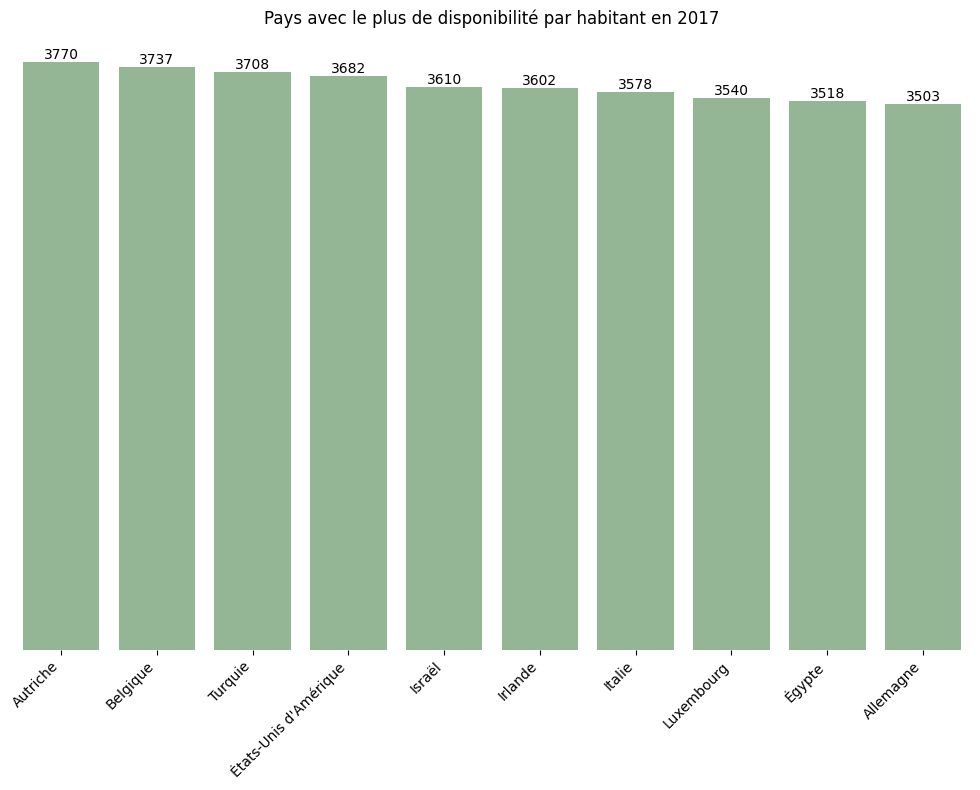

In [60]:
# Création du graphique avec Seaborn
plt.figure(figsize=(10, 8))

# Ajout des données
sns.barplot(x=top_10_pays_plus_dispo_2017.index, y=top_10_pays_plus_dispo_2017.values, color = 'darkseagreen')

# Ajout des valeurs sur les barres
for index, value in enumerate(top_10_pays_plus_dispo_2017.values):
  plt.text(index, value, round(value), ha='center', va='bottom')

# Ajout du titre
plt.xlabel('')
plt.title('Pays avec le plus de disponibilité par habitant en 2017')

# Enlever l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.11 - Exemple de la Thaïlande pour le Manioc

Prenons l'exemple de la Thaïlande et du manioc. Cette analyse approfondie vise à détailler les concepts précédemment abordés en se concentrant spécifiquement sur le manioc.

In [61]:
# Fonction permettant d'afficher le df dispo_alimentaire en ciblant un pays
def dispo_pays(pays):
  dispo_pays = dispo_alimentaire[dispo_alimentaire['Zone'] == pays]
  return dispo_pays

In [62]:
# Filtre sur le Manioc
manioc_thailande = dispo_pays('Thaïlande').loc[dispo_pays('Thaïlande')['Produit']=="Manioc"]
manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [63]:
# Fonction permettant d'afficher la population, le nombre de personne en sous-nutrition et la proportion de ce nombre entre 2013 et 2017
def table_popu_sous_nutri_pays(pays) :
  table_popu_sous_nutri_pays = population_sous_nutrition.loc[population_sous_nutrition['Zone'] == pays].head(6)
  return table_popu_sous_nutri_pays

In [64]:
table_popu_sous_nutri_pays('Thaïlande')

,Zone,Année,Population,sous_nutrition,proportion par pays
1090,Thaïlande,2013,68144518,6200000.0,9.10
1091,Thaïlande,2014,68438746,6000000.0,8.77
1092,Thaïlande,2015,68714511,5900000.0,8.59
1093,Thaïlande,2016,68971308,6000000.0,8.70
1094,Thaïlande,2017,69209810,6200000.0,8.96


In [65]:
# On calcule la proportion exportée en fonction de la production
export_manioc = round((manioc_thailande['Exportations - Quantité'] / manioc_thailande['Production']) * 100, 2)
nourriture_manioc = round((manioc_thailande['Nourriture'] / manioc_thailande['Production']) * 100, 2)

print(f"Bien que 9% de la population Thaïlandaise soit en sous-nutrition entre 2013 et 2017, le pays exporte plus de {export_manioc.values[0]}% de sa production de manioc en 2017 et ne consacre que {nourriture_manioc.values[0]}% à l'alimentation humaine !")

Bien que 9% de la population Thaïlandaise soit en sous-nutrition entre 2013 et 2017, le pays exporte plus de 83.41% de sa production de manioc en 2017 et ne consacre que 2.88% à l'alimentation humaine !


In [66]:
# Fonction permettant d'afficher la dispo kcal par personne selon le pays choisi
def kcal_par_pers(pays):
  kcal_par_pers = kcal_par_pers_2017.loc[kcal_par_pers_2017.index== pays]
  kcal_par_pers_pays = kcal_par_pers.reset_index()
  return kcal_par_pers_pays

In [67]:
# Quelle est la disponibilité par habitant pour la Thaïlande ?
display(kcal_par_pers('Thaïlande'))
print('Il y a 2785 kcals par personne en Thaïlande en 2017, ce qui place ce pays au dessus des recommandations de la FAO (2200 kcals).')

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Thaïlande,2785.0


Il y a 2785 kcals par personne en Thaïlande en 2017, ce qui place ce pays au dessus des recommandations de la FAO (2200 kcals).


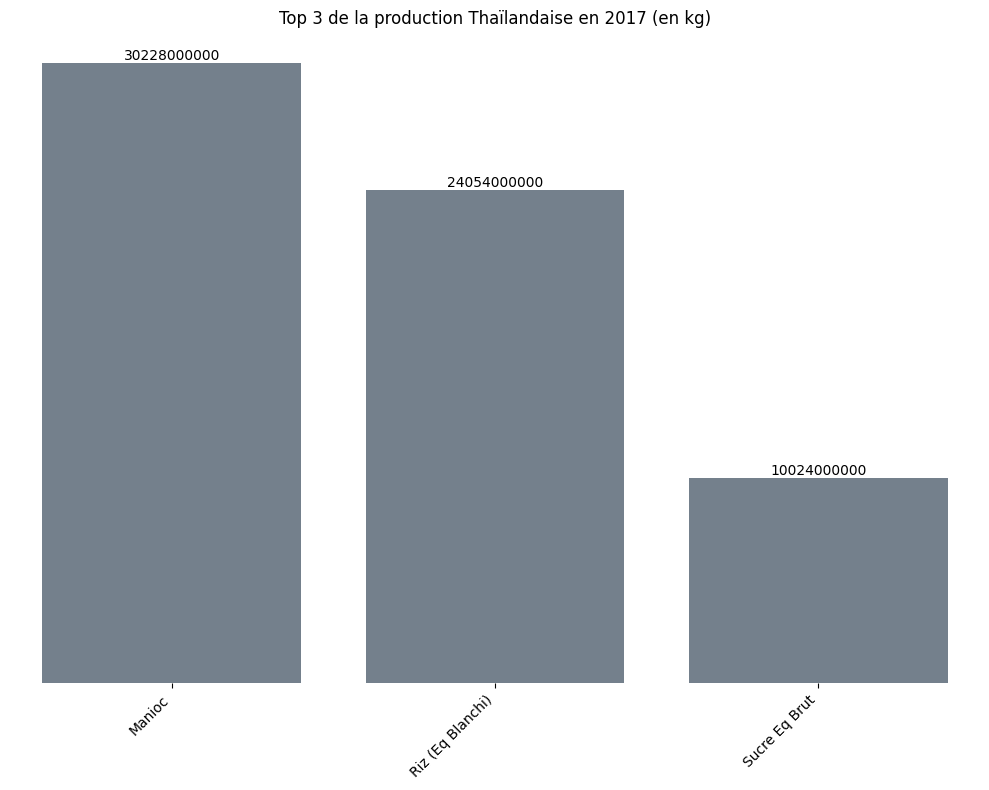

Le Manioc est la denrée la plus produite par la Thaïlande.


In [68]:
# Top 3 produits de la Thaïlande
df_produc_thailande = (dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']
                .groupby('Produit')
                .sum()
                .sort_values(by='Exportations - Quantité', ascending=False)
                .head(3)
               )

# Création du graphique en barres avec Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Produit', y='Production', data=df_produc_thailande, color='slategrey')

# Ajout des valeurs au-dessus des barres
for index, value in enumerate(df_produc_thailande['Production']):
    plt.text(index, value, round(value), ha='center', va='bottom')

# Ajour des titres
plt.xlabel('')
plt.title('Top 3 de la production Thaïlandaise en 2017 (en kg)')

# Supression de l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Ajustement des étiquettes de l'axe x
plt.xticks(rotation=45, ha='right')

# Amélioration de la lisibilité du graphique
plt.tight_layout()

plt.show()

print("Le Manioc est la denrée la plus produite par la Thaïlande.")

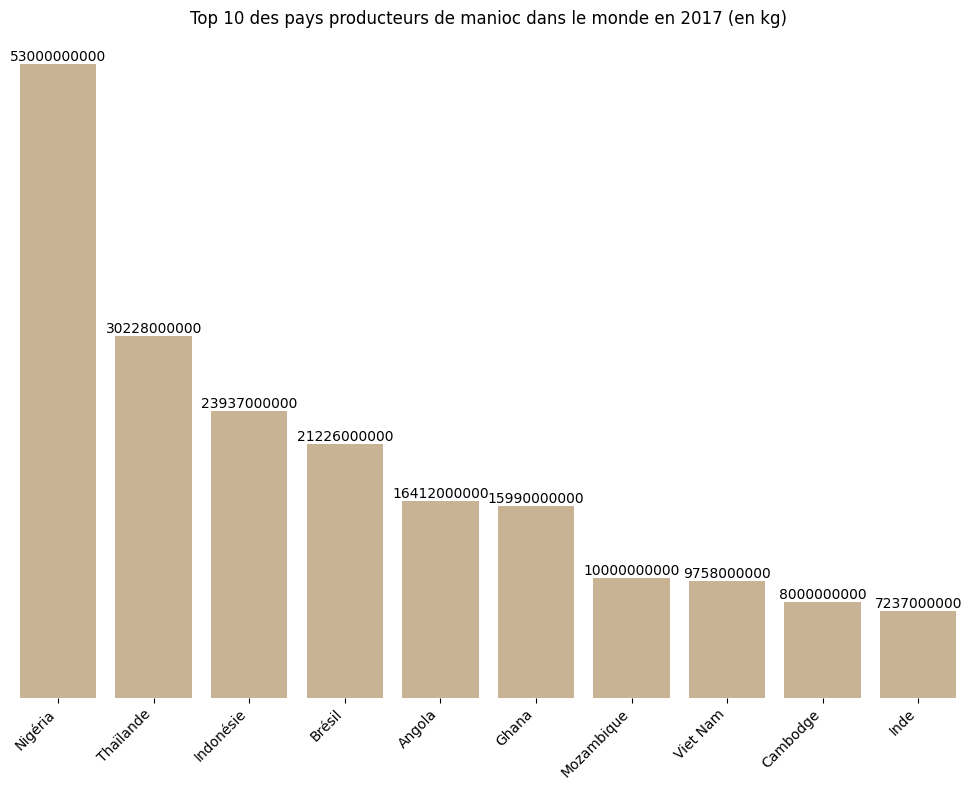

La Thaïlande est le 2ème plus gros producteur de manioc dans le monde derrière le Nigeria, mais le Nigeria l'utilise principalement pour ses propres besoins.


In [69]:
# Top 10 des pays producteur de manioc
df_produc_manioc = (dispo_alimentaire[dispo_alimentaire['Produit'] == 'Manioc']
                    .sort_values(by='Production', ascending=False)
)

# Variable pour n'avoir que le 10 premiers producteurs de manioc
top_10_produc_manioc = df_produc_manioc.head(10)

# Création du graphique en barres avec Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Zone', y='Production', data=top_10_produc_manioc, color='tan')

# Ajout des valeurs au-dessus des barres
for index, value in enumerate(top_10_produc_manioc['Production']):
    plt.text(index, value, round(value), ha='center', va='bottom')

# Ajout des titres
plt.xlabel('')
plt.title('Top 10 des pays producteurs de manioc dans le monde en 2017 (en kg)')

# Supression de l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Ajustement des étiquettes de l'axe x
plt.xticks(rotation=45, ha='right')

# Améliorarion de la lisiblité du graphique
plt.tight_layout()

plt.show()

print("La Thaïlande est le 2ème plus gros producteur de manioc dans le monde derrière le Nigeria, mais le Nigeria l'utilise principalement pour ses propres besoins.")

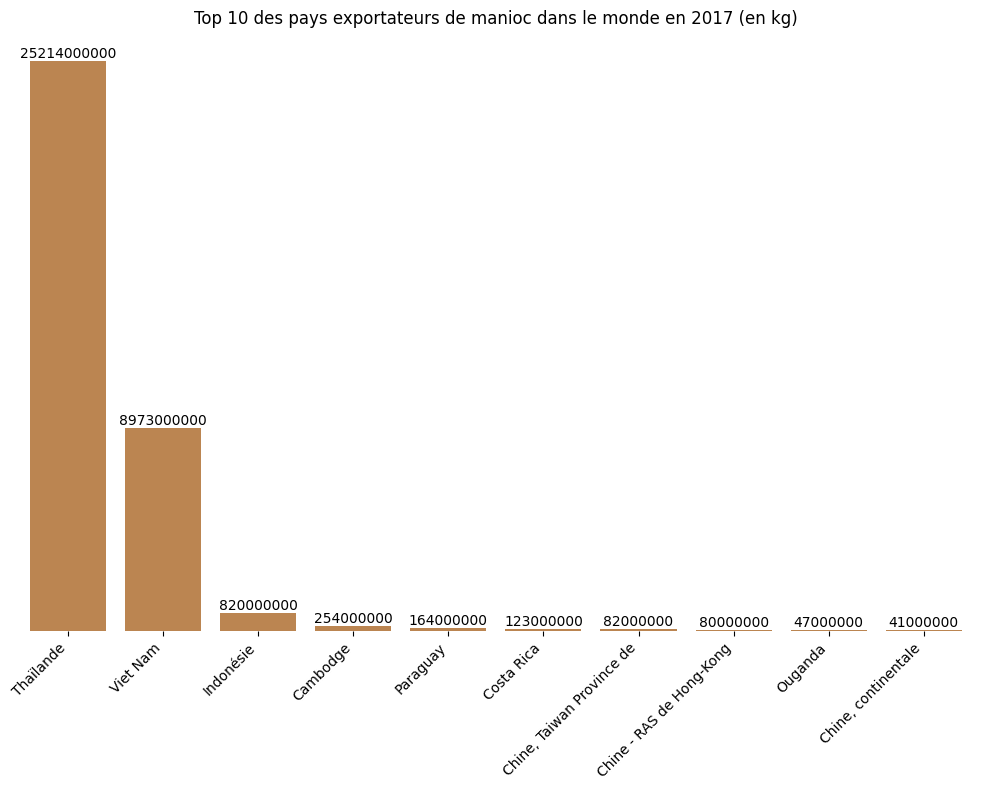

In [70]:
# Top 10 des pays exportateur de manioc
df_expor_manioc = (dispo_alimentaire[dispo_alimentaire['Produit'] == 'Manioc']
                   .sort_values(by='Exportations - Quantité', ascending=False)
)

#Variable pour n'avoir que les 10 premiers pays exportateur de manioc
top_10_expor_manioc = df_expor_manioc.head(10)

# Création du graphique en barres avec Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Zone', y='Exportations - Quantité', data=top_10_expor_manioc, color='peru')

# Ajout des valeurs au-dessus des barres
for index, value in enumerate(top_10_expor_manioc['Exportations - Quantité']):
    plt.text(index, value, round(value), ha='center', va='bottom')

# Ajout des titres
plt.xlabel('')
plt.title('Top 10 des pays exportateurs de manioc dans le monde en 2017 (en kg)')

# Supression de l'axe des y et sa ligne
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# Ajustement des étiquettes de l'axe x
plt.xticks(rotation=45, ha='right')

# Amélioration de la lisibilité du graphique
plt.tight_layout()

plt.show()

In [71]:
# Calcul de la production totale de manioc
production_manioc_total = df_produc_manioc['Production'].sum()

# Calcul de l'exportation totale de manioc
export_manioc_total = df_expor_manioc['Exportations - Quantité'].sum()


production_manioc_thailande = 30228000000


export_manioc_thailande = 25214000000

# Calcul de la proportion de la production thaïlandaise de manioc par rapport au reste du monde
propor_production_manioc_thailande = round((production_manioc_thailande/production_manioc_total)*100, 2)

# Calcul de la proportion de l'exportation thaïlandaise de manioc par rapport au reste du monde
propor_export_manioc_thailande = round((export_manioc_thailande/export_manioc_total)*100, 2)

print(f"La Thaïlande est le 1er exportateur de manioc dans le monde, le pays exporte 25 millions de tonnes de manioc, soit {propor_export_manioc_thailande}% de l'exportation mondiale.")

La Thaïlande est le 1er exportateur de manioc dans le monde, le pays exporte 25 millions de tonnes de manioc, soit 69.94% de l'exportation mondiale.


# Etape 4 - Analyses complémentaires

## Evolution de l'aide alimentaire entre 2013 et 2016

In [72]:
# Création d'un df de la population en sous-nutrition se concentrant sur la période allant de 2013 à 2016
popu_sous_nutri_2013_2016 = population_sous_nutrition.groupby('Année').sum().drop(2017, axis=0)
popu_sous_nutri_2013_2016['proportion sous-nutrition'] = (popu_sous_nutri_2013_2016['sous_nutrition'] / popu_sous_nutri_2013_2016['Population']) * 100
popu_sous_nutri_2013_2016.drop('proportion par pays', axis=1, inplace=True)

# Affichage des 5 premièrs lignes du dataframe
popu_sous_nutri_2013_2016.head()

,Zone,Population,sous_nutrition,proportion sous-nutrition
Année,,,,
2013,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,7210845848,528100000.0,7.323690
2014,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,7295557771,523500000.0,7.175599
2015,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,7380067075,524700000.0,7.109691
2016,AfghanistanAfrique du SudAlbanieAlgérieAllemag...,7464294742,528600000.0,7.081714


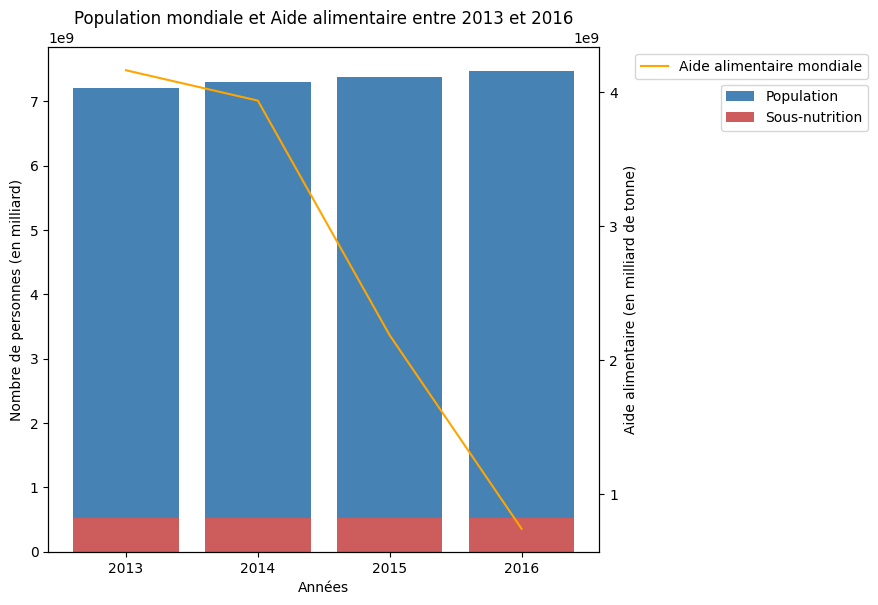

Alors que le nombre de personnes en sous-nutrition reste constant au fil des ans, l'aide alimentaire diminue chaque année, se réduisant à un quart de son niveau entre 2013 et 2016.


In [73]:
# Données pour le premier graphique
years = popu_sous_nutri_2013_2016.index
popu_2013_2016 = popu_sous_nutri_2013_2016['Population']
sous_nut_2013_2016 = popu_sous_nutri_2013_2016['sous_nutrition']

# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer les barres empilées pour la population et la sous-nutrition
ax1.bar(years, popu_2013_2016, color='steelblue', align='center', label='Population')
ax1.bar(years, sous_nut_2013_2016, color='indianred', align='center', label='Sous-nutrition')

# Ajouter des étiquettes, un titre et une légende pour le premier axe
ax1.set_xlabel('Années')
ax1.set_ylabel('Nombre de personnes (en milliard)')
ax1.set_title('Population mondiale et Aide alimentaire entre 2013 et 2016')
ax1.legend(bbox_to_anchor=(1.5, 0.94))

# Désactiver la grille pour le premier axe
ax1.grid(False)

# Créer le deuxième axe y pour le deuxième graphique
ax2 = ax1.twinx()

# Données pour le deuxième graphique
aide_par_annee = aide_alimentaire.groupby('Année').sum()

# Tracer la courbe pour l'évolution de l'aide alimentaire mondiale
sns.lineplot(x=aide_par_annee.index, y='Valeur', data=aide_par_annee, ax=ax2, color='orange', label="Aide alimentaire mondiale")

# Ajouter des étiquettes et une légende pour le deuxième axe
ax2.set_ylabel("Aide alimentaire (en milliard de tonne)")
ax2.legend(bbox_to_anchor=(1.5, 1))

# Désactiver la grille pour le deuxième axe
ax2.grid(False)

# Récupérer les positions des traits d'axe du premier graphique
yticks1 = ax1.get_yticks()

# Adapter les positions des traits d'axe du deuxième graphique
yticks2 = [ytick for ytick in yticks1 if ytick >= ax2.get_ylim()[0] and ytick <= ax2.get_ylim()[1]]
ax2.set_yticks(yticks2)

# Afficher le graphique
plt.xticks(years)
plt.tight_layout()
plt.show()

print("Alors que le nombre de personnes en sous-nutrition reste constant au fil des ans, l'aide alimentaire diminue chaque année, se réduisant à un quart de son niveau entre 2013 et 2016.")

In [74]:
# Affichage des 10 premiers pays ayant reçu le plus d'aide alimentaire pour chaque année entre 2013 et 2016
for year in range(2013, 2017):
    display(aide_alimentaire.loc[aide_alimentaire['Année'] == year].sort_values(by='Valeur', ascending=False).head(10))

print("On constate une baisse de l'aide au niveau des céréales au fil des ans.")


,Zone,Année,Produit,Valeur
362,Éthiopie,2013,Céréales,256196000
1013,République arabe syrienne,2013,Céréales,189623000
357,Éthiopie,2013,Blé et Farin,181066000
1270,Soudan,2013,Céréales,140255000
1273,Soudan,2013,Céréales Secondaires,130677000
1005,République arabe syrienne,2013,Blé et Farin,122708000
1422,Yémen,2013,Céréales,117155000
1418,Yémen,2013,Blé et Farin,116637000
626,Kenya,2013,Céréales,92906000
1027,République arabe syrienne,2013,Non-céréales,92273000


,Zone,Année,Produit,Valeur
363,Éthiopie,2014,Céréales,265013000
1014,République arabe syrienne,2014,Céréales,225007000
1297,Soudan du Sud,2014,Céréales Secondaires,213730000
1294,Soudan du Sud,2014,Céréales,213730000
358,Éthiopie,2014,Blé et Farin,178646000
1271,Soudan,2014,Céréales,145696000
1274,Soudan,2014,Céréales Secondaires,133830000
1006,République arabe syrienne,2014,Blé et Farin,103823000
1028,République arabe syrienne,2014,Non-céréales,101209000
63,Bangladesh,2014,Céréales,94706000


,Zone,Année,Produit,Valeur
1015,République arabe syrienne,2015,Céréales,181475000
1424,Yémen,2015,Céréales,151251000
1420,Yémen,2015,Blé et Farin,117854000
1034,République arabe syrienne,2015,"Riz, total",88076000
364,Éthiopie,2015,Céréales,86482000
1029,République arabe syrienne,2015,Non-céréales,81052000
359,Éthiopie,2015,Blé et Farin,74090000
1007,République arabe syrienne,2015,Blé et Farin,68726000
628,Kenya,2015,Céréales,45899000
1025,République arabe syrienne,2015,"Légumineuses Sèches,Tot.",44995000


,Zone,Année,Produit,Valeur
1425,Yémen,2016,Céréales,196027000
1421,Yémen,2016,Blé et Farin,179332000
905,Niger,2016,Céréales,40386000
1442,Yémen,2016,Non-céréales,36760000
925,Niger,2016,"Riz, total",34525000
1030,République arabe syrienne,2016,Non-céréales,29710000
1016,République arabe syrienne,2016,Céréales,29569000
1026,République arabe syrienne,2016,"Légumineuses Sèches,Tot.",21752000
1434,Yémen,2016,"Légumineuses Sèches,Tot.",18648000
1438,Yémen,2016,Mélanges et préparations,16695000


On constate une baisse de l'aide au niveau des céréales au fil des ans.


In [75]:
# Affichage
display(df_cereale.groupby('Zone').sum().sort_values(by='Production', ascending= False).head(10))

print("Il serait interessant de pouvoir comparer la production de céréales entre 2013 et 2016, notamment au USA qui produit et exporte une très grande quantité de céréales.")

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
"Chine, continentale","AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,1.930420e+11,4.018000e+10,1428.0,150.89,5.97,33.86,4.834820e+11,2.084000e+09,1.478600e+10,2.090380e+11,2.019900e+10,4.850730e+11,1.117300e+10,9.848000e+09,-1.429400e+10
États-Unis d'Amérique,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,1.400960e+11,1.371810e+11,801.0,105.63,3.63,23.70,3.430060e+11,6.630200e+10,1.347700e+10,3.381000e+10,2.220000e+08,4.336860e+11,3.098000e+09,2.860800e+10,-3.785400e+10
Inde,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,1.141900e+10,4.500000e+07,1361.0,148.46,5.68,32.33,2.165170e+11,2.454600e+10,1.140000e+08,1.858860e+11,1.205900e+10,2.409260e+11,6.703000e+09,4.700000e+08,2.300000e+07
Brésil,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,4.326400e+10,1.000000e+06,969.0,116.24,2.88,22.66,7.945500e+10,2.892200e+10,1.076800e+10,2.329000e+10,9.775000e+09,9.715700e+10,7.800000e+08,2.346000e+09,4.510000e+08
Fédération de Russie,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,3.080600e+10,1.900000e+07,1153.0,148.00,3.93,33.81,6.822700e+10,1.955700e+10,2.298000e+09,2.114100e+10,9.740000e+08,9.007300e+10,1.121200e+10,4.077000e+09,-4.584000e+09
France,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,1.910300e+10,3.437000e+09,960.0,127.24,4.67,29.33,3.553600e+10,3.689300e+10,3.726000e+09,8.181000e+09,5.750000e+08,6.746900e+10,1.169000e+09,3.073000e+09,1.231000e+09
Canada,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,2.390500e+10,9.500000e+08,909.0,119.37,3.29,26.34,3.276900e+10,2.724500e+10,2.780000e+09,4.200000e+09,4.920000e+08,6.640600e+10,1.361000e+09,2.198000e+09,-9.169000e+09
Indonésie,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,8.045000e+09,1.195600e+10,1751.0,195.48,6.92,35.39,7.453200e+10,3.390000e+08,1.095500e+10,4.884500e+10,5.077000e+09,6.605600e+10,5.840000e+08,6.600000e+07,-2.141000e+09
Ukraine,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",vegetalevegetalevegetalevegetalevegetalevegeta...,1.989000e+10,3.600000e+07,1060.0,138.41,3.85,30.80,3.223500e+10,2.778900e+10,2.750000e+08,6.261000e+09,1.947000e+09,6.263800e+10,2.634000e+09,1.467000e+09,-2.890000e+09


Il serait interessant de pouvoir comparer la production de céréales entre 2013 et 2016, notamment au USA qui produit et exporte une très grande quantité de céréales.


##Analyse Haïti

In [76]:
# Création d'un df regroupant l'aide alimentaire par pays
pourcentage_aide = aide_alimentaire.groupby('Zone').sum()
pourcentage_aide.drop('Année', axis=1, inplace=True)

# Calcul du total de chaque ligne
total_aide_2013_2016 = pourcentage_aide['Valeur'].sum()

# Ajout de la colonne répartition pour identifier la part de l'aide alimentaire par pays
pourcentage_aide['repartition_aide'] = (pourcentage_aide['Valeur']/total_aide_2013_2016)*100

#Reset_index pour filtrer plus facilement sur le pays
pourcentage_aide.reset_index(drop=False, inplace=True)

display(table_popu_sous_nutri_pays('Haïti'))
display(pourcentage_aide.loc[pourcentage_aide['Zone']=="Haïti"])

print("Bien qu'étant le pays avec la plus grande proportion de personnes en sous-nutrition entre 2013 et 2017, Haïti ne représente que 1% des aides alimentaires entre 2013 et 2016 !")

,Zone,Année,Population,sous_nutrition,proportion par pays
435,Haïti,2013,10400675,5100000.0,49.04
436,Haïti,2014,10549009,5100000.0,48.35
437,Haïti,2015,10695542,5100000.0,47.68
438,Haïti,2016,10839970,5200000.0,47.97
439,Haïti,2017,10982366,5300000.0,48.26


,Zone,Produit,Valeur,repartition_aide
25,Haïti,Autres non-céréalesAutres non-céréalesAutres n...,116450000,1.055193


Bien qu'étant le pays avec la plus grande proportion de personnes en sous-nutrition entre 2013 et 2017, Haïti ne représente que 1% des aides alimentaires entre 2013 et 2016 !


In [77]:
# Fonction permettant d'afficher un graphique de la répartition de la disponibilité alimentaire selon le pays sélectionné
def graph_repartition_dispo_pays(pays):
    repartition_dispo_pays = dispo_alimentaire.loc[dispo_alimentaire['Zone'] == pays]
    data_dispo_bar = repartition_dispo_pays[liste_dispo_int]
    # Calcul de la somme de chaque colonne
    total_data_colonne = data_dispo_bar.sum(axis=0)
    # Calcul du total
    total = total_data_colonne.sum()
    # Tri des données en ordre décroissant
    total_data_colonne_sorted = total_data_colonne.sort_values(ascending=False)
    # Création du graphique avec Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=total_data_colonne_sorted.values / total * 100, y=total_data_colonne_sorted.index, palette='viridis')
    # Ajout des étiquettes sur les barres
    for i, v in enumerate(total_data_colonne_sorted.values):
        plt.text(v / total * 100 + 0.1, i, f"{v / total * 100:.2f}%", color='black', ha='left', va='center')
    # Enlever l'axe des x et sa ligne
    plt.gca().axes.get_xaxis().set_visible(False)
    sns.despine(left=True, bottom=True)
    # Supprimer l'étiquette de l'axe des y
    plt.ylabel('')
    # Ajout du titre
    plt.title(f'Répartition de la disponibilité intérieure ({pays})')
    # Affichage du graphique
    plt.show()

<ipython-input-77-2414ab0b8a34>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_data_colonne_sorted.values / total * 100, y=total_data_colonne_sorted.index, palette='viridis')


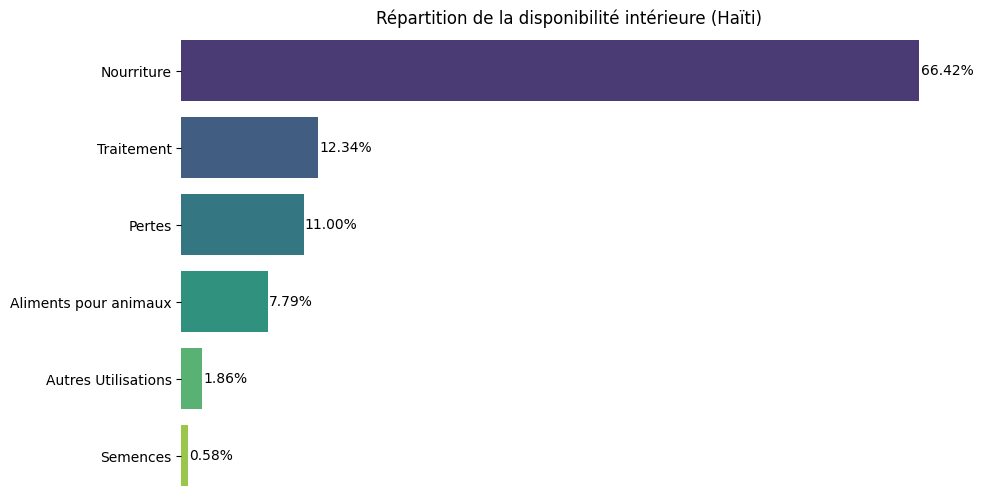

Le Pays consacre la plus grosse partie de sa disponiblité pour l'alimentation humaine et n'exporte que 0.3% de sa production.


In [78]:
# Calcul de l'exportation en utilisant la fonction dispo_pays
export_haiti = round((dispo_pays('Haïti')['Exportations - Quantité'].sum() / dispo_pays('Haïti')['Production'].sum()) * 100, 2)

graph_repartition_dispo_pays('Haïti')

print(f"Le Pays consacre la plus grosse partie de sa disponiblité pour l'alimentation humaine et n'exporte que {export_haiti}% de sa production.")

##Top 10 des produits exportés dans le monde

In [79]:
# Affichage du df dispo_alimentaire trié sur les 10 produits les plus exportés
display(dispo_alimentaire.sort_values(by='Exportations - Quantité', ascending = False).head(10))

print("Les céréales se retrouvent parmis les produits les plus exportés.")
print("Le manioc exporté par la Thaïlande se retrouve lui aussi dans la liste des 10 produits les plus exportés")

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
2159,Brésil,Soja,vegetale,6.370000e+08,0.000000e+00,18.0,3.62,0.18,2.33,3.808600e+10,4.279700e+10,2.830000e+08,7.250000e+08,0.000000e+00,8.170000e+10,1.211000e+09,3.551300e+10,-1.100000e+09
15420,États-Unis d'Amérique,Soja,vegetale,2.240000e+09,0.000000e+00,0.0,0.04,0.00,0.02,5.267200e+10,3.918400e+10,1.267000e+09,1.200000e+07,5.910000e+08,9.138900e+10,2.640000e+09,4.718900e+10,-8.000000e+08
15352,États-Unis d'Amérique,Blé,vegetale,6.196000e+09,1.600000e+07,599.0,80.43,2.85,19.35,3.405100e+10,3.469100e+10,5.491000e+09,2.574200e+10,0.000000e+00,5.796700e+10,2.096000e+09,0.000000e+00,5.284000e+09
2161,Brésil,Sucre Eq Brut,vegetale,0.000000e+00,4.130000e+09,386.0,39.61,0.00,0.00,1.206700e+10,2.772800e+10,1.000000e+07,7.937000e+09,0.000000e+00,3.949400e+10,0.000000e+00,0.000000e+00,2.920000e+08
2130,Brésil,Maïs,vegetale,4.048700e+10,0.000000e+00,240.0,28.01,0.98,5.31,5.473700e+10,2.678000e+10,9.790000e+08,5.612000e+09,8.145000e+09,8.053800e+10,3.860000e+08,1.080000e+08,0.000000e+00
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.00,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,8.710000e+08,1.511000e+09,3.022800e+10,0.000000e+00,0.000000e+00,0.000000e+00
15391,États-Unis d'Amérique,Maïs,vegetale,1.280240e+11,1.370230e+11,92.0,12.24,0.26,1.67,2.927760e+11,2.465500e+10,3.595000e+09,3.917000e+09,0.000000e+00,3.536990e+11,5.820000e+08,2.323000e+10,-3.986300e+10
6323,Indonésie,Huile de Palme,vegetale,0.000000e+00,2.514000e+09,116.0,4.80,13.16,0.00,3.714000e+09,2.333300e+10,1.520000e+08,1.200000e+09,0.000000e+00,2.689600e+10,0.000000e+00,0.000000e+00,0.000000e+00
4851,France,Blé,vegetale,7.822000e+09,2.824000e+09,811.0,108.43,4.20,25.99,2.029800e+10,2.150200e+10,2.055000e+09,6.971000e+09,3.580000e+08,3.861400e+10,7.480000e+08,1.575000e+09,1.131000e+09
2815,Canada,Blé,vegetale,3.731000e+09,6.640000e+08,637.0,84.96,2.50,20.51,8.381000e+09,2.070400e+10,8.180000e+08,2.989000e+09,2.100000e+07,3.753000e+10,1.031000e+09,0.000000e+00,-9.262000e+09


Les céréales se retrouvent parmis les produits les plus exportés.
Le manioc exporté par la Thaïlande se retrouve lui aussi dans la liste des 10 produits les plus exportés


## Corrélation entre la sous-nutrition et la disponiblité alimentaire en 2017

In [80]:
# Création d'un df isolant l'année 2017
df_sous_nut_2017 = population_sous_nutrition.loc[population_sous_nutrition['Année']==2017]

In [81]:
# Création d'un df regroupant les données par pays
df_dispo_pays = dispo_alimentaire.groupby('Zone').sum()

In [82]:
# Fusion des deux df précédemment crées pour avoir toutes les données de l'année 2017
df_nuage = pd.merge(df_dispo_pays, df_sous_nut_2017, on=['Zone'], how='left')

# Indices des colonnes à supprimer
indices_a_supprimer = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Suppression des colonnes par leurs indices
df_nuage = df_nuage.drop(df_nuage.columns[indices_a_supprimer], axis=1)

# Renommer la colonne des personnes en sous-nutrition
df_nuage.rename(columns={'proportion par pays': '% sous-nutrition'}, inplace=True)

# Tri de la dispo en ordre décroissant
df_nuage = df_nuage.sort_values(by ='Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)

# Affichage des premières lignes du DataFrame
df_nuage.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),% sous-nutrition
128,République centrafricaine,1879.0,0.00
166,Zambie,1924.0,0.00
91,Madagascar,2056.0,41.06
0,Afghanistan,2087.0,28.93
65,Haïti,2089.0,48.26


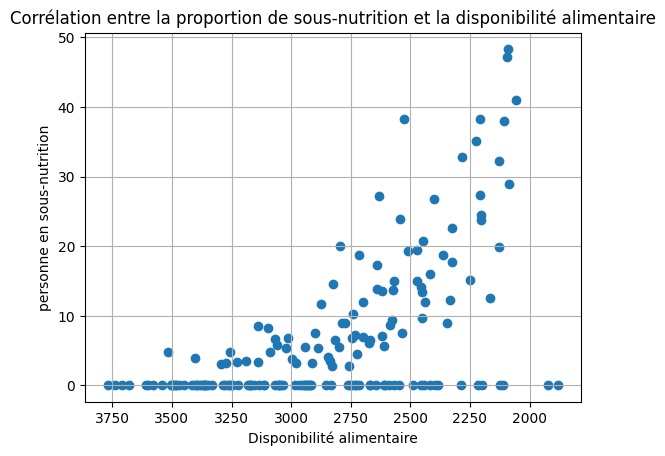

On constate une corrélation entre la proportion de personnes en sous-nutrition et la disponiblité alimentaire au sein d'un pays.


In [83]:
# Création du nuage de points
plt.scatter(df_nuage['Disponibilité alimentaire (Kcal/personne/jour)'], df_nuage['% sous-nutrition'])

# Ajout des titres
plt.xlabel('Disponibilité alimentaire')
plt.ylabel('personne en sous-nutrition')
plt.title('Corrélation entre la proportion de sous-nutrition et la disponibilité alimentaire')

# Activation de la grille sur le graphique
plt.grid(True)

# Inversion de l'axe x
plt.gca().invert_xaxis()
plt.show()

print("On constate une corrélation entre la proportion de personnes en sous-nutrition et la disponiblité alimentaire au sein d'un pays.")

In [84]:
#Export du df pour récupérer les données
df_nuage.to_csv('df_nuage.csv', index=False)

#Table des fonctions :



**dimensions**(*df*) ==> renvoi les dimensions d'un dataframe

##Année##

**popu**(*annee*) ==> renvoi la population mondiale selon l'année choisie

**sous_nut**(*annee*) ==> renvoi le nombre de personnes en sous-nutrition dans le monde selon l'année choisis

**pourcentage_sous_nutrition**(*annee*) ==> renvoi le pourcentage de personnes en sous-nutrition par rapport à la population mondiale selon l'année choisie

**pie_sous_nutrition**(*annee*) ==> renvoi un pie chart de la proportion de personnes en sous-nutrition dans le monde selon l'année choisie

**graph_top10_sous_nut**(*annee*) ==> renvoi un bar chart des 10 pires pays en sous-nutrition selon l'année choisie

##Pays##

**popu_pays**(*pays, annee*) ==> renvoi la population selon le pays et l'année choisis

**sous_nut_pays**(*pays, annee*) ==> renvoi le nombre de personnes en sous-nutrition selon le pays et l'année choisie

**pourcentage_sous_nutrition_pays**(*pays, annee*) ==> renvoi le pourcentage de personnes en sous-nutrition par rapport à la population du pays selon le pays et l'année choisis

**pie_sous_nutrition_pays**(*pays, annee*) ==> renvoi un pie chart de la proportion de personnes en sous-nutrition au sein d'un pays selon le pays et l'année choisis

**table_popu_sous_nutri_pays**(*pays*) ==> renvoi un df des données globales de population et de sous-nutrition d'un pays entre 2013 et 2017 selon le pays choisi

**dispo_pays**(*pays*) ==> renvoi le df dispo_alimentaire ciblé selon le pays choisi

**kcal_par_pers**(*pays*) ==> renvoi le nombre de kcals par personne selon le pays choisi

**graph_repartition_dispo_pays**(*pays*) ==> renvoi un bar chart de la répartition de la disponibilité d'un pays selon le pays choisi